我这边是每一次run必须使用下面这一块，否则显示level0错误

In [83]:
import importlib
import BetweenCountry
import DataProcess
importlib.reload(BetweenCountry)
importlib.reload(DataProcess)

<module 'DataProcess' from 'E:\\Xiaotong\\UIUC\\FA24\\IS597\\HW\\Project\\2024Fall_projects_Olympic_Effect\\DataProcess.py'>

In [53]:
import pandas as pd

In [36]:
from DataProcess import preprocess_csv_type1
from DataProcess import preprocess_csv_type2
from DataProcess import preprocess_csv_type3
from DataProcess import preprocess_special_csv

In [84]:
from BetweenCountry import index_rename_and_calculate_growth_rate
from BetweenCountry import growth_rate_plot
from BetweenCountry import two_subplots
from BetweenCountry import two_plot_health

## Economic Indicator

* GDP

In [13]:
AUS_GDP = preprocess_csv_type1(
    file_path='data/australia-gdp-gross-domestic-product.csv',
    date_column='Date',
    year_column='Date',
    year_range=(1995, 2005),
    skip_rows=7
)

CHI_GDP = preprocess_csv_type1(
    file_path='data/China-gdp.csv',
    date_column='DATE',
    year_column='DATE',
    year_range=(2003, 2013),
    value_column='MKTGDPCNA646NWDB',
    skip_rows=0,
    convert_to_billion=True,
    column_label='GDP'
)


print(AUS_GDP.head())
print(CHI_GDP.head())

    Date  GDP (Billions of US $)  Per Capita (US $)  Annual % Change
35  1995              368.166023         20448.1220           3.8832
36  1996              401.341881         22021.7839           3.8639
37  1997              435.642611         23646.6230           3.9132
38  1998              399.674422         21479.1142           4.6633
39  1999              389.652212         20712.6698           5.0276
    DATE          GDP
43  2003  1660.280544
44  2004  1955.346769
45  2005  2285.961150
46  2006  2752.118657
47  2007  3550.327803


In [140]:
# Set index to continuous int
# Find out the 2 csv have different names for 'Date' column & 'GDP' column, rename it.
# Sometimes the strip doesn't work in DataProcess, need to check
# Calculate growth rate per year
cleaned_df1 = index_rename_and_calculate_growth_rate(
    df=AUS_GDP,
    rename_dict=
        {'Date': 'Year', 'GDP (Billions of US $)': 'GDP'},
    host_year=2000,
    metric_column='GDP')

cleaned_df2 = index_rename_and_calculate_growth_rate(
    df=CHI_GDP,
    rename_dict=
        {'DATE': 'Year', 'GDP (Billion)': 'GDP'},
    host_year=2008,
    metric_column='GDP')

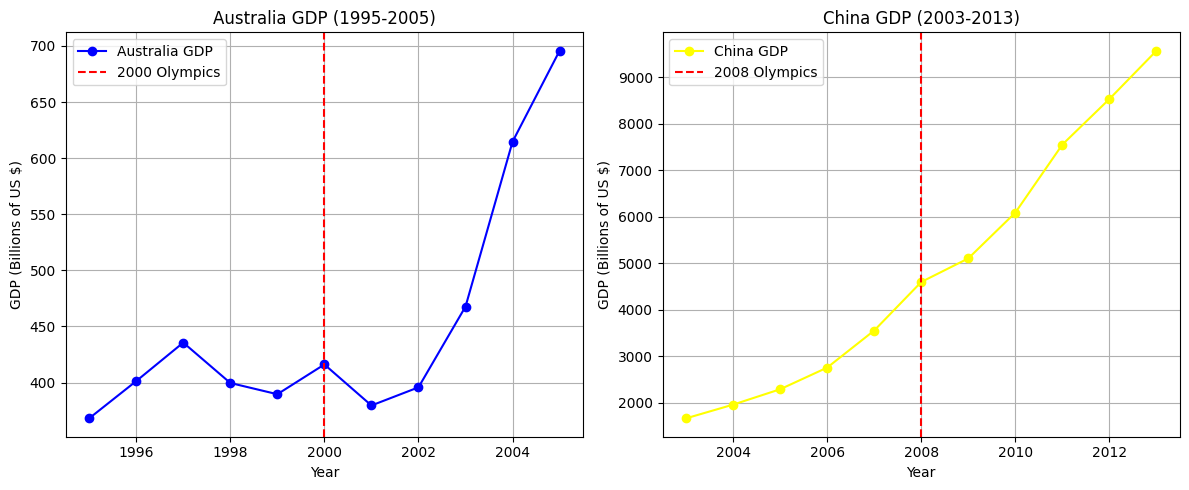

In [141]:
two_subplots(
    df1=cleaned_df1,
    host_year1=2000,
    legend1="Australia GDP",
    title1="Australia GDP (1995-2005)",
    df2=cleaned_df2,
    host_year2=2008,
    legend2="China GDP",
    title2="China GDP (2003-2013)",
    x_column='Year',
    y_column='GDP',
    xlabel="Year",
    ylabel="GDP (Billions of US $)",
)

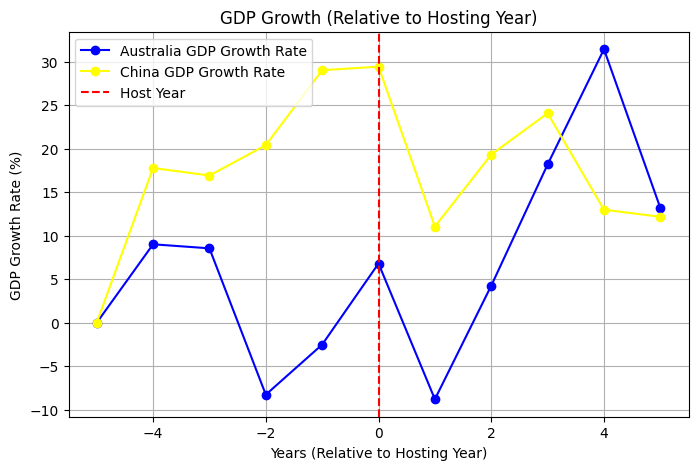

In [142]:
growth_rate_plot(
    dfs=[cleaned_df1,cleaned_df2], 
    countries=['Australia', 'China'], 
    metric='GDP',
    colors=None
)

* Foreign Direct Investment

In [143]:
AUS_FDI = preprocess_csv_type3(
        file_path='data/Foreign_Direct _Investment.csv',
        country_column='Country Name',
        countries=['Australia'],
        year_column='Year',
        year_range=(1995,2005),
        skip_rows=3,
        value_column='Value',
        convert_to_billion=True,
        column_label='FDI'
    )


CHI_FDI = preprocess_csv_type3(
        file_path='data/Foreign_Direct _Investment.csv',
        country_column='Country Name',
        countries=['China'],
        year_column='Year',
        year_range=(2003,2013),
        skip_rows=3,
        value_column='Value',
        convert_to_billion=True,
        column_label='FDI'
    )

print(AUS_FDI.head())  # test success
print(CHI_FDI.head())  # test success

   Country Name  Year        FDI
35    Australia  1995  13.268875
36    Australia  1996   4.563952
37    Australia  1997   8.088069
38    Australia  1998   7.597611
39    Australia  1999   2.210918
   Country Name  Year         FDI
43        China  2003   57.900937
44        China  2004   68.117272
45        China  2005  104.108694
46        China  2006  124.082036
47        China  2007  156.249335


In [147]:
cleaned_df1_FDI = index_rename_and_calculate_growth_rate(
    df=AUS_FDI,
    rename_dict=None,
    host_year=2000,
    metric_column='FDI')

cleaned_df2_FDI = index_rename_and_calculate_growth_rate(
    df=CHI_FDI,
    rename_dict=None,
    host_year=2008,
    metric_column='FDI')

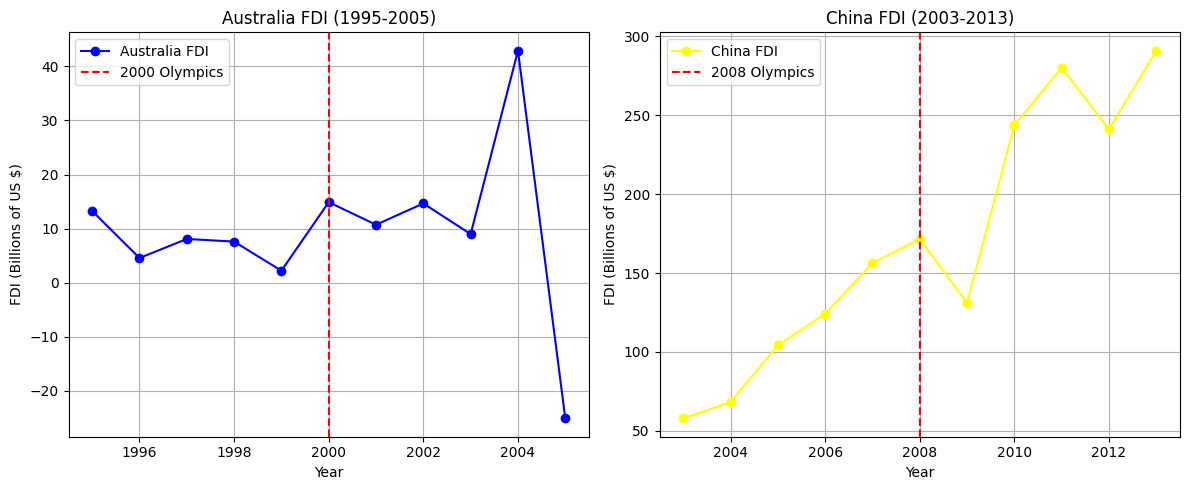

In [148]:
two_subplots(
    df1=cleaned_df1_FDI,
    host_year1=2000,
    legend1="Australia FDI",
    title1="Australia FDI (1995-2005)",
    df2=cleaned_df2_FDI,
    host_year2=2008,
    legend2="China FDI",
    title2="China FDI (2003-2013)",
    x_column='Year',
    y_column='FDI',
    xlabel="Year",
    ylabel="FDI (Billions of US $)",
)

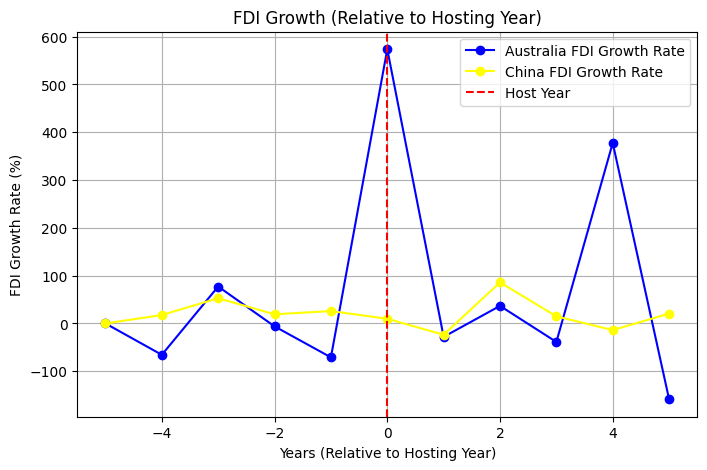

In [149]:
growth_rate_plot(
    dfs=[cleaned_df1_FDI,cleaned_df2_FDI], 
    countries=['Australia', 'China'], 
    metric='FDI',
    colors=None
)

* Gov. Consumption

In [16]:
AUS_gov_consume = preprocess_csv_type3(
        file_path='data/Government_consumption.csv',
        country_column='Country Name',
        countries=['Australia'],
        year_column='Year',
        year_range=(1995, 2005),
        skip_rows=3,
        value_column='Value',
        convert_to_billion=True,
        column_label='Gov_Consumption'
    )


CHI_gov_consume = preprocess_csv_type3(
        file_path='data/Government_consumption.csv',
        country_column='Country Name',
        countries=['China'],
        year_column='Year',
        year_range=(2003, 2013),
        skip_rows=3,
        value_column='Value',
        convert_to_billion=True,
        column_label='Gov_Consumption'
    )
print(AUS_gov_consume.head())  # test success
print(CHI_gov_consume.head())  # test success

   Country Name  Year  Gov_Consumption
35    Australia  1995        68.630829
36    Australia  1996        74.587956
37    Australia  1997        79.594491
38    Australia  1998        72.989894
39    Australia  1999        72.984710
   Country Name  Year  Gov_Consumption
43        China  2003       254.258838
44        China  2004       285.976158
45        China  2005       338.268817
46        China  2006       407.878185
47        China  2007       519.297995


In [17]:
cleaned_df1_gov_consume = index_rename_and_calculate_growth_rate(
    df=AUS_gov_consume,
    rename_dict=None,
    host_year=2000,
    metric_column='Gov_Consumption')

cleaned_df2_gov_consume = index_rename_and_calculate_growth_rate(
    df=CHI_gov_consume,
    rename_dict=None,
    host_year=2008,
    metric_column='Gov_Consumption')

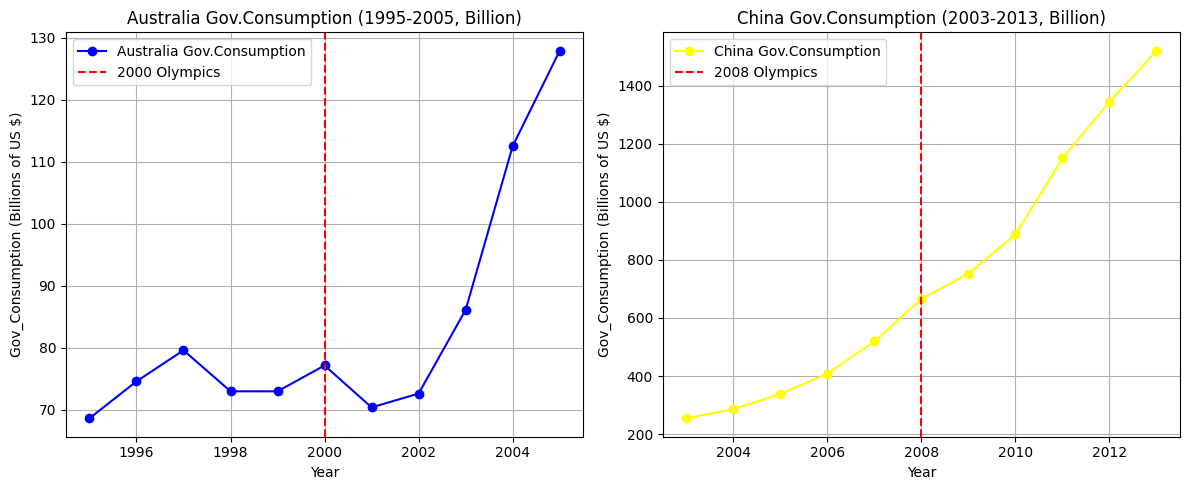

In [27]:
two_subplots(
    df1=cleaned_df1_gov_consume,
    host_year1=2000,
    legend1="Australia Gov.Consumption",
    title1="Australia Gov.Consumption (1995-2005, Billion)",
    df2=cleaned_df2_gov_consume,
    host_year2=2008,
    legend2="China Gov.Consumption",
    title2="China Gov.Consumption (2003-2013, Billion)",
    x_column='Year',
    y_column='Gov_Consumption',
    xlabel="Year",
    ylabel="Gov_Consumption (Billions of US $)",
)

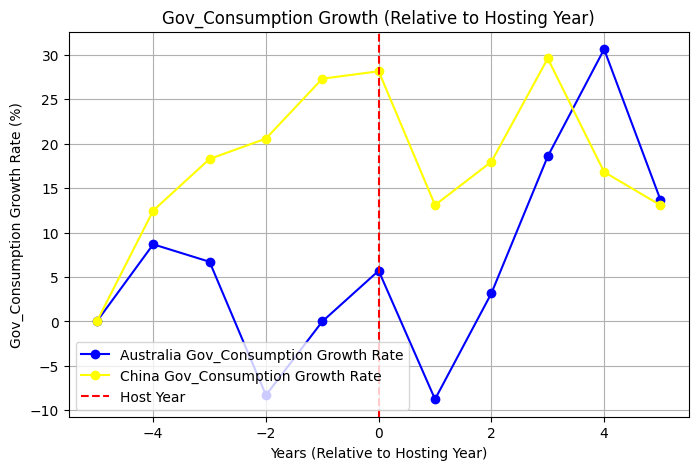

In [19]:
growth_rate_plot(
    dfs=[cleaned_df1_gov_consume,cleaned_df2_gov_consume], 
    countries=['Australia', 'China'], 
    metric='Gov_Consumption',
    colors=None
)

## Tourism Performance

In [23]:
AUS_tourism = preprocess_csv_type3(
        file_path='data/tourism_data.csv',
        country_column='Country Name',
        countries=['Australia'],
        year_column='Year',
        year_range=(1995, 2005),
        skip_rows=3,
        value_column='Value',
        convert_to_million=True,
        column_label='Tourism'
    )

CHI_tourism = preprocess_csv_type3(
        file_path='data/tourism_data.csv',
        country_column='Country Name',
        countries=['China'],
        year_column='Year',
        year_range=(2003, 2013),
        skip_rows=3,
        value_column='Value',
        convert_to_million=True,
        column_label='Tourism'
    )

print(AUS_tourism.head())  # test success
print(CHI_tourism.head())  # test success

   Country Name  Year  Tourism
35    Australia  1995    3.726
36    Australia  1996    4.165
37    Australia  1997    4.318
38    Australia  1998    4.167
39    Australia  1999    4.459
   Country Name  Year  Tourism
43        China  2003   91.662
44        China  2004  109.038
45        China  2005  120.292
46        China  2006  124.942
47        China  2007  131.873


In [24]:
cleaned_df1_tour = index_rename_and_calculate_growth_rate(
    df=AUS_tourism,
    rename_dict={'Tourism':'Num_Arrivals'},
    host_year=2000,
    metric_column='Num_Arrivals')

cleaned_df2_tour = index_rename_and_calculate_growth_rate(
    df=CHI_tourism,
    rename_dict={'Tourism':'Num_Arrivals'},
    host_year=2008,
    metric_column='Num_Arrivals')

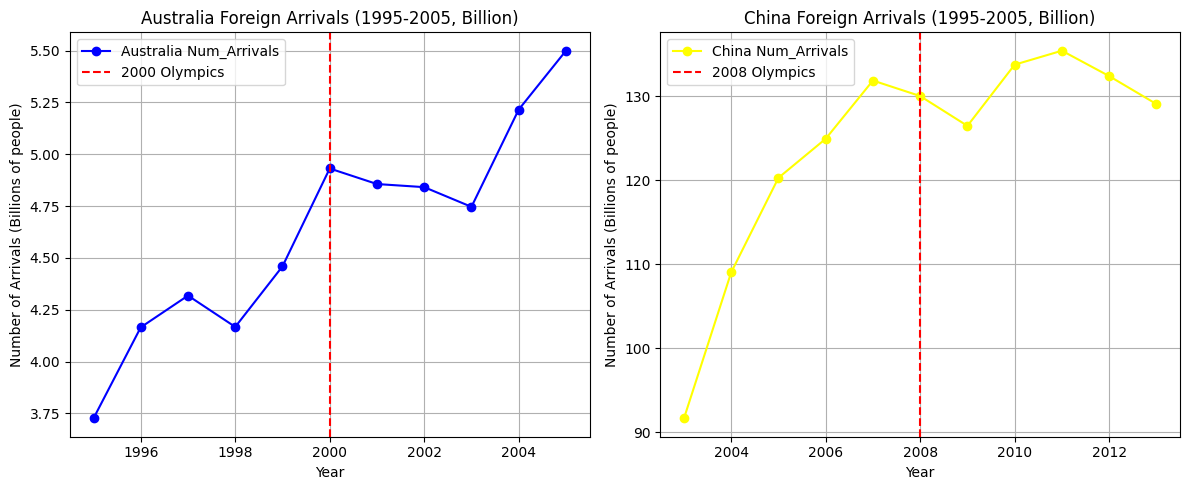

In [25]:
two_subplots(
    df1=cleaned_df1_tour,
    host_year1=2000,
    legend1="Australia Num_Arrivals",
    title1="Australia Foreign Arrivals (1995-2005, Billion)",
    df2=cleaned_df2_tour,
    host_year2=2008,
    legend2="China Num_Arrivals",
    title2="China Foreign Arrivals (1995-2005, Billion)",
    x_column='Year',
    y_column='Num_Arrivals',
    xlabel="Year",
    ylabel="Number of Arrivals (Billions of people)",
)

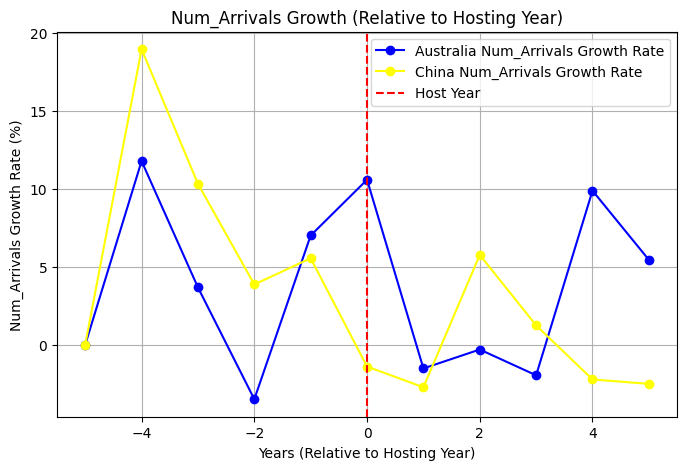

In [26]:
growth_rate_plot(
    dfs=[cleaned_df1_tour,cleaned_df2_tour], 
    countries=['Australia', 'China'], 
    metric='Num_Arrivals',
    colors=None
)

## Health Metrics

* Obesity

In [76]:
AUS_obesity = preprocess_csv_type2(
        file_path='data/Prevalence_of_obesity_among_adults.csv',
        country_column='Location',
        countries=['Australia'],
        year_column='Period',
        year_range=(1995, 2005),
        skip_rows=0
    )

CHI_obesity = preprocess_csv_type2(
        file_path='data/Prevalence_of_obesity_among_adults.csv',
        country_column='Location',
        countries=['China'],
        year_column='Period',
        year_range=(2003,2013),
        skip_rows=0
    )
print(AUS_obesity.head())  # test success
print(CHI_obesity.head())  # test success

      Location  Period        Dim1  Value
104  Australia    2005        Male   23.5
105  Australia    2005      Female   23.5
106  Australia    2005  Both sexes   23.5
110  Australia    2004        Male   22.8
111  Australia    2004  Both sexes   22.9
   Location  Period        Dim1  Value
57    China    2013        Male    4.6
58    China    2013  Both sexes    4.9
59    China    2013      Female    5.1
63    China    2012        Male    4.3
64    China    2012  Both sexes    4.6


In [85]:
def process_heath_data(df, host_year):
    """
    Process obesity data for each gender and calculate growth rates.
    
    :param df: DataFrame to process
    :param host_year: Year used as the reference for calculating growth rates
    :return: Combined DataFrame with growth rates for all genders
    """
    gender_list = ['Female', 'Male', 'Both sexes']  # List of genders to process
    processed_data = []
    
    for gender in gender_list:
        processed_df = index_rename_and_calculate_growth_rate(
            df=df[df['Dim1'] == gender].copy(),
            rename_dict={'Location': 'Country', 'Period': 'Year', 'Dim1': 'Gender', 'Value': 'Rate'},
            host_year=host_year,
            metric_column='Rate'
        )
        processed_data.append(processed_df) 
    return pd.concat(processed_data, ignore_index=True)


In [86]:
cleaned_df1_obe = process_heath_data(AUS_obesity, host_year=2000)
cleaned_df2_obe = process_heath_data(CHI_obesity, host_year=2008)

print("Australia Data:")
print(cleaned_df1_obe.head())
print("\nChina Data:")
print(cleaned_df2_obe.head())

Australia Data:
   index    Country  Year  Gender  Rate  Growth Rate (%)  Relative Year
0    166  Australia  1995  Female  16.8         0.000000             -5
1    160  Australia  1996  Female  17.5        -2.127660             -4
2    154  Australia  1997  Female  18.3        -2.608696             -3
3    148  Australia  1998  Female  19.0        -2.678571             -2
4    141  Australia  1999  Female  19.8        -3.211009             -1

China Data:
   index Country  Year  Gender  Rate  Growth Rate (%)  Relative Year
0    119   China  2003  Female   3.0         0.000000             -5
1    113   China  2004  Female   3.2        -3.921569             -4
2    107   China  2005  Female   3.3        -6.122449             -3
3    101   China  2006  Female   3.5        -4.347826             -2
4     95   China  2007  Female   3.7        -6.818182             -1


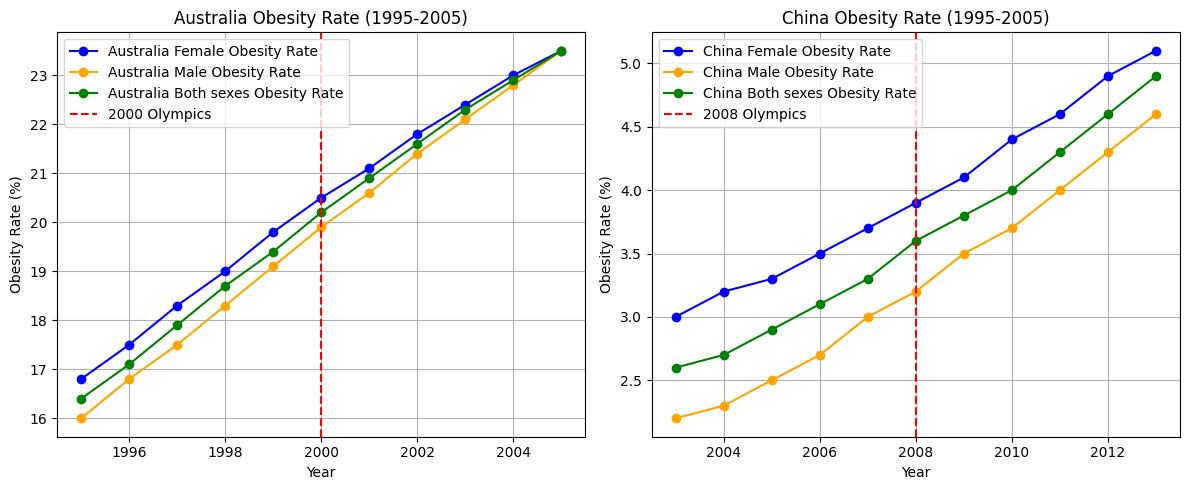

In [88]:
two_plot_health(
    gender_column='Gender',
    metric='Obesity Rate',
    df1=cleaned_df1_obe,
    host_year1=2000,
    title1="Australia Obesity Rate (1995-2005)",
    df2=cleaned_df2_obe,
    host_year2=2008,
    title2="China Obesity Rate (1995-2005)",
    x_column='Year',
    y_column='Rate',
    xlabel="Year",
    ylabel="Obesity Rate (%)",
)

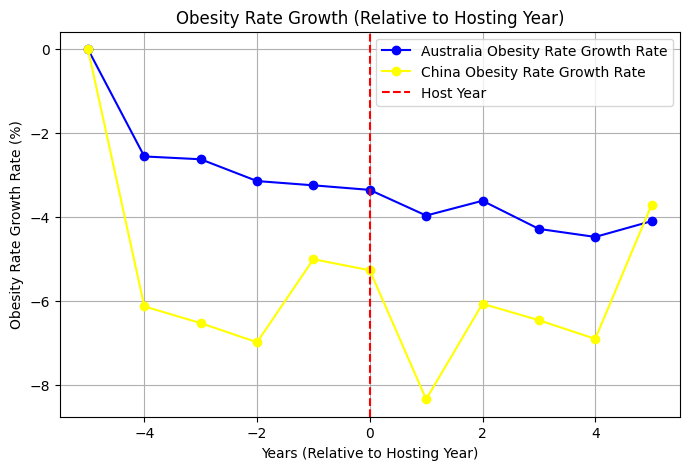

In [89]:
growth_rate_plot(
    dfs=[
        cleaned_df1_obe[cleaned_df1_obe['Gender'] == 'Both sexes'], 
        cleaned_df2_obe[cleaned_df2_obe['Gender'] == 'Both sexes']
    ], 
    countries=['Australia', 'China'], 
    metric='Obesity Rate',
    colors=None
)

* Under Weight

In [90]:
AUS_underweight = preprocess_csv_type2(
        file_path='data/Prevalence_of_underweight_among_adults.csv',
        country_column='Location',
        countries=['Australia'],
        year_column='Period',
        year_range=(1995, 2005),
        skip_rows=0
    )
    

CHI_underweight = preprocess_csv_type2(
        file_path='data/Prevalence_of_obesity_among_adults.csv',
        country_column='Location',
        countries=['China'],
        year_column='Period',
        year_range=(2003, 2013),
        skip_rows=0
    )
print(AUS_underweight.head())  # test success
print(CHI_underweight.head())  # test success

      Location  Period        Dim1  Value
102  Australia    2005        Male    0.9
103  Australia    2005  Both sexes    1.5
104  Australia    2005      Female    2.0
108  Australia    2004        Male    0.9
109  Australia    2004  Both sexes    1.5
   Location  Period        Dim1  Value
57    China    2013        Male    4.6
58    China    2013  Both sexes    4.9
59    China    2013      Female    5.1
63    China    2012        Male    4.3
64    China    2012  Both sexes    4.6


In [91]:
cleaned_df1_underweight = process_heath_data(AUS_underweight, host_year=2000)
cleaned_df2_underweight = process_heath_data(CHI_underweight, host_year=2008)

print("Australia Data:")
print(cleaned_df1_underweight.head())
print("\nChina Data:")
print(cleaned_df2_underweight.head())

Australia Data:
   index    Country  Year  Gender  Rate  Growth Rate (%)  Relative Year
0    165  Australia  1995  Female   2.7         0.000000             -5
1    158  Australia  1996  Female   2.6         5.000000             -4
2    152  Australia  1997  Female   2.5         0.000000             -3
3    146  Australia  1998  Female   2.4         0.000000             -2
4    140  Australia  1999  Female   2.3         4.761905             -1

China Data:
   index Country  Year  Gender  Rate  Growth Rate (%)  Relative Year
0    119   China  2003  Female   3.0         0.000000             -5
1    113   China  2004  Female   3.2        -3.921569             -4
2    107   China  2005  Female   3.3        -6.122449             -3
3    101   China  2006  Female   3.5        -4.347826             -2
4     95   China  2007  Female   3.7        -6.818182             -1


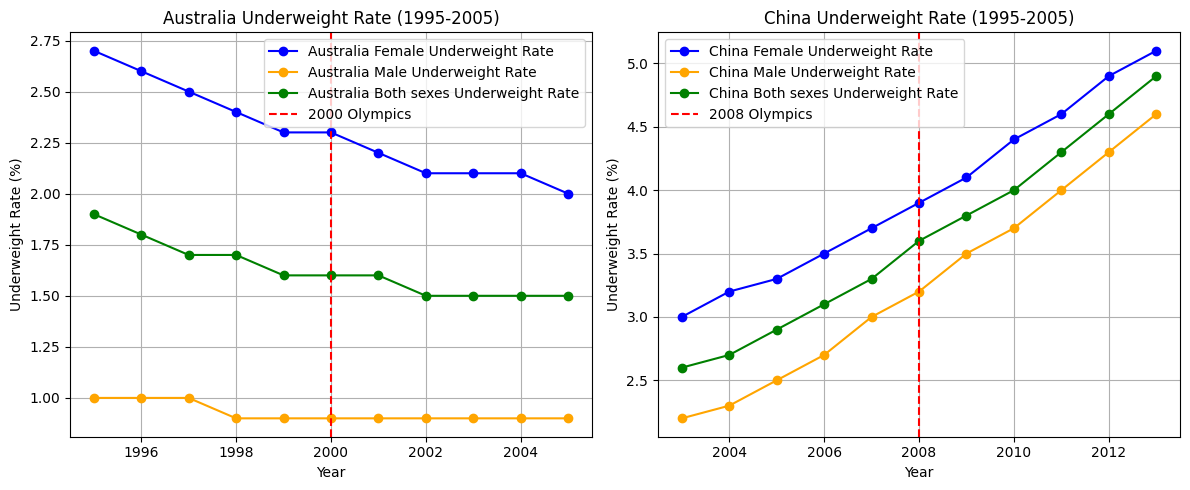

In [92]:
two_plot_health(
    gender_column='Gender',
    metric='Underweight Rate',
    df1=cleaned_df1_underweight,
    host_year1=2000,
    title1="Australia Underweight Rate (1995-2005)",
    df2=cleaned_df2_underweight,
    host_year2=2008,
    title2="China Underweight Rate (1995-2005)",
    x_column='Year',
    y_column='Rate',
    xlabel="Year",
    ylabel="Underweight Rate (%)",
)

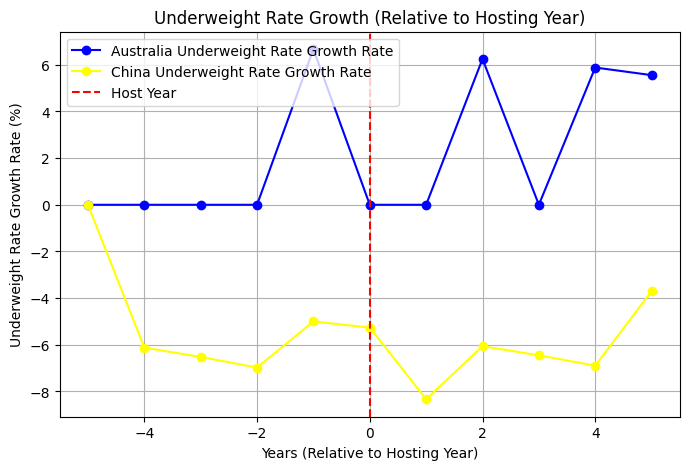

In [93]:
growth_rate_plot(
    dfs=[
        cleaned_df1_underweight[cleaned_df1_underweight['Gender'] == 'Both sexes'], 
        cleaned_df2_underweight[cleaned_df2_underweight['Gender'] == 'Both sexes']
    ], 
    countries=['Australia', 'China'], 
    metric='Underweight Rate',
    colors=None
)

## Environment Indicators

* Greenhouse Gas Emission

In [14]:
AUS_GHG_emission = preprocess_csv_type3(
        file_path='data/ghg-emissions.csv',
        country_column='Country/Region',
        countries=['Australia'],
        year_column='Year',
        year_range=(1995,2005)
    )


CHI_GHG_emission = preprocess_csv_type3(
        file_path='data/ghg-emissions.csv',
        country_column='Country/Region',
        countries=['China'],
        year_column='Year',
        year_range=(2003,2013)
    )
print(AUS_GHG_emission.head()) 
print(CHI_GHG_emission.head()) 

  Country/Region  Year   Value
5      Australia  1995  571.19
6      Australia  1996  571.01
7      Australia  1997  582.28
8      Australia  1998  608.08
9      Australia  1999   643.6
   Country/Region  Year    Value
13          China  2003  5386.89
14          China  2004  6135.95
15          China  2005  6862.81
16          China  2006  7547.54
17          China  2007  8165.43


In [9]:
cleaned_df1_GHG = index_rename_and_calculate_growth_rate(
    df=AUS_GHG_emission,
    rename_dict={'Value':'MtCO₂e'},
    host_year=2000,
    metric_column='MtCO₂e')

cleaned_df2_GHG = index_rename_and_calculate_growth_rate(
    df=CHI_GHG_emission,
    rename_dict={'Value':'MtCO₂e'},
    host_year=2008,
    metric_column='MtCO₂e')

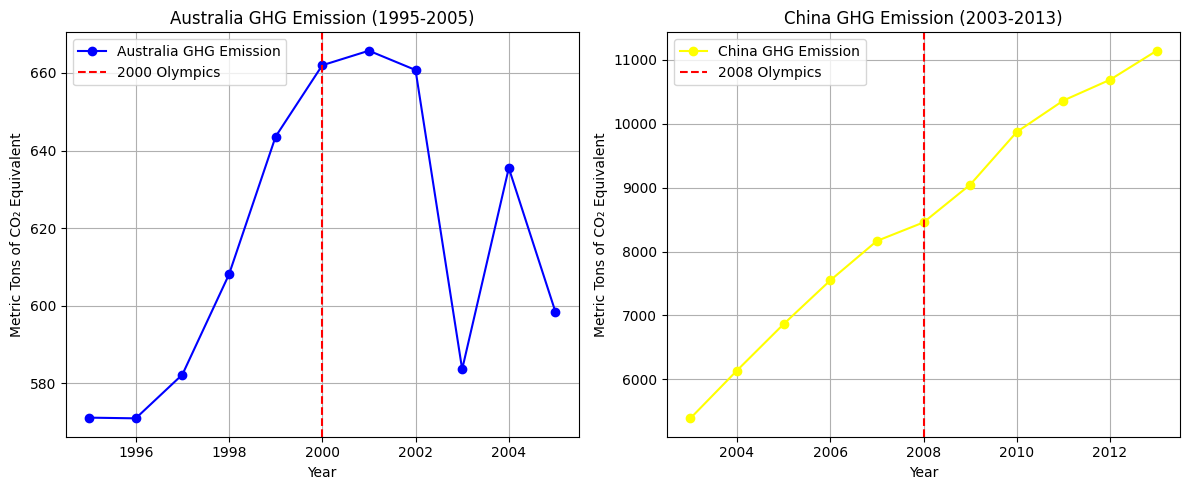

In [11]:
two_subplots(
    df1=cleaned_df1_GHG,
    host_year1=2000,
    legend1="Australia GHG Emission",
    title1="Australia GHG Emission (1995-2005)",
    df2=cleaned_df2_GHG,
    host_year2=2008,
    legend2="China GHG Emission",
    title2="China GHG Emission (2003-2013)",
    x_column='Year',
    y_column='MtCO₂e',
    xlabel="Year",
    ylabel="Metric Tons of CO₂ Equivalent",
)

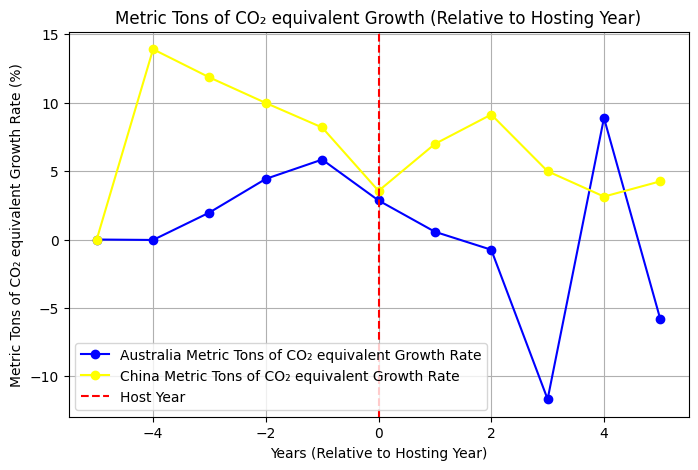

In [12]:
growth_rate_plot(
    dfs=[cleaned_df1_GHG,cleaned_df2_GHG], 
    countries=['Australia', 'China'], 
    metric='Metric Tons of CO₂ equivalent',
    colors=None
)

* Renewable Energy Consumption

#### Renewable Energy Consumption的csv似乎用的是% of total energy consumption。仅仅用这个数据比较会没有意义，因为澳大利亚和中国的total energy consumption未知（csv里没有）

## Labor Market

In [15]:
AUS_UR = preprocess_csv_type3(
        file_path='data/Unemployment_rate_Australia.csv.csv',
        country_column='Country Name',
        countries=['Australia'],
        year_column='Year',
        year_range=(1995, 2005),
        skip_rows=4
    )


CHI_UR = preprocess_special_csv(
        file_path='data/Unemployment_rate_China.csv',
        year_column='Year',
        year_range=(2003, 2013),
        skip_rows=2
    )

print(AUS_UR.head())
print(CHI_UR.head())

   Country Name  Year  Value
35    Australia  1995  8.473
36    Australia  1996  8.509
37    Australia  1997  8.367
38    Australia  1998  7.684
39    Australia  1999  6.876
                             Indicator  Year  Value
4   Unemployment Rate in Urban Area(%)  2003    4.1
7   Unemployment Rate in Urban Area(%)  2004    4.1
10  Unemployment Rate in Urban Area(%)  2005    4.1
13  Unemployment Rate in Urban Area(%)  2006    4.1
16  Unemployment Rate in Urban Area(%)  2007    4.1


In [5]:
cleaned_df1_UR = index_rename_and_calculate_growth_rate(
    df=AUS_UR,
    rename_dict={'Value':'Unemployment_Rate(%)'},
    host_year=2000,
    metric_column='Unemployment_Rate(%)')

cleaned_df2_UR = index_rename_and_calculate_growth_rate(
    df=CHI_UR,
    rename_dict={'Value':'Unemployment_Rate(%)'},
    host_year=2008,
    metric_column='Unemployment_Rate(%)')

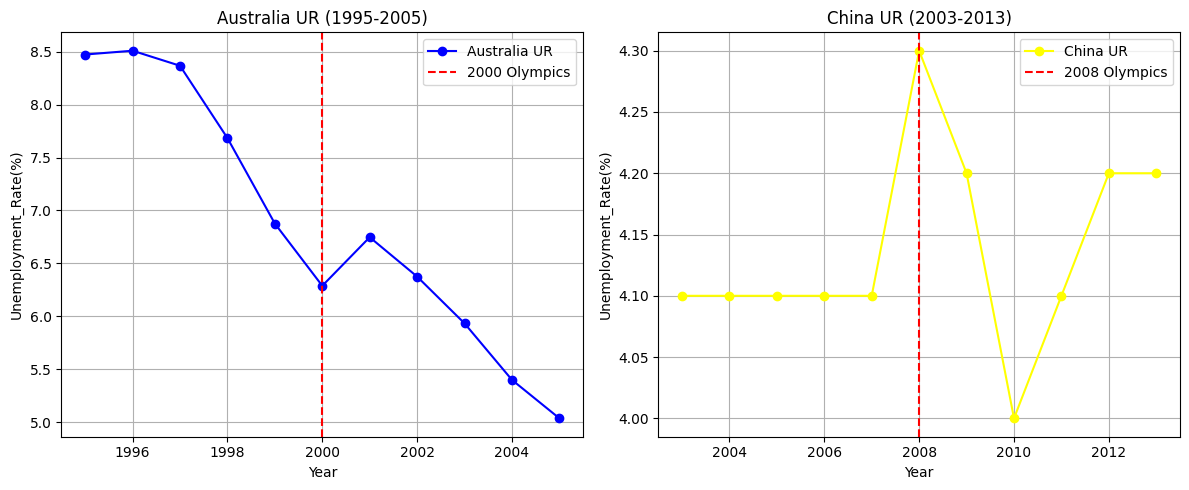

In [6]:
two_subplots(
    df1=cleaned_df1_UR,
    host_year1=2000,
    legend1="Australia UR",
    title1="Australia UR (1995-2005)",
    df2=cleaned_df2_UR,
    host_year2=2008,
    legend2="China UR",
    title2="China UR (2003-2013)",
    x_column='Year',
    y_column='Unemployment_Rate(%)',
    xlabel="Year",
    ylabel="Unemployment_Rate(%)",
)

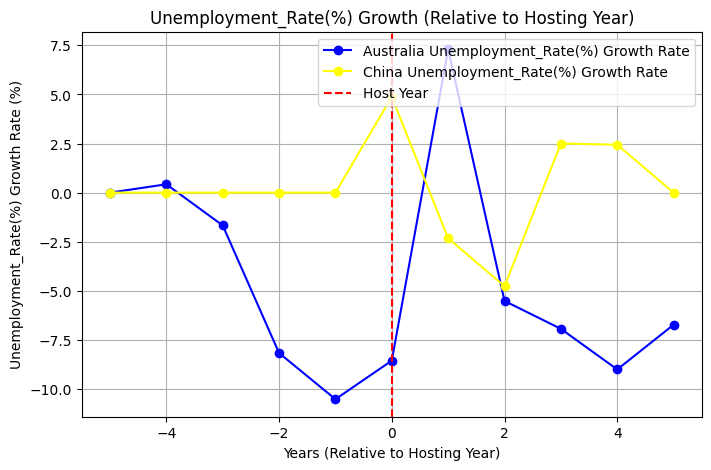

In [7]:
growth_rate_plot(
    dfs=[cleaned_df1_UR,cleaned_df2_UR], 
    countries=['Australia', 'China'], 
    metric='Unemployment_Rate(%)',
    colors=None
)